In [57]:
import pickle

# AgeV, AgeV50, GenV, GenV50, WratV, WratV50

with open('../../Work/LatentSim/Greed/WratValidation50FeatDP5DP2.pkl', 'rb') as f:
    WratV50, _ = pickle.load(f)
    
print('Complete')

Complete


In [60]:
import numpy as np

lim = 6

AgeVn = WratV50[:,:,1,:,0].astype('int').flatten()
AgeVnc = np.bincount(AgeVn)
idcs = np.flip(np.argsort(AgeVnc))
c = np.unique(AgeVn).shape[0]
for idx in idcs[:c+1]:
    if AgeVnc[idx] > lim:
        print(idx)
    else:
        break
for idx in idcs[:c+1]:
    if AgeVnc[idx] > lim:
        print(AgeVnc[idx])
    else:
        break
for idx in idcs[:c+1]:
    if AgeVnc[idx] > lim:
        print(f'{xi[idx]}, {yi[idx]}')
    else:
        break
# print(idcs[:c+1])
# print(AgeVnc[idcs[:c+1]])

9966
11041
28176
20562
18228
10407
7218
20542
29867
29871
31319
12
11
9
9
8
8
8
8
7
7
7
41, 45
45, 242
149, 165
95, 138
81, 247
43, 45
28, 261
95, 118
165, 168
165, 172
181, 188


In [19]:
xi, yi = np.triu_indices(264,1)

In [64]:
# Histogram graph

regionCorr = np.zeros((7,2,int(263*264/2)))

for i in range(7):
    for j,mod in enumerate(['Nback', 'Emoid']):
        with open(f'../../Work/LatentSim/GreedMasks/GenderHist{i}{mod}.pkl', 'rb') as f:
            regionCorr[i,j] = pickle.load(f)
            
print('Complete')

Complete


/home/anton/.conda/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


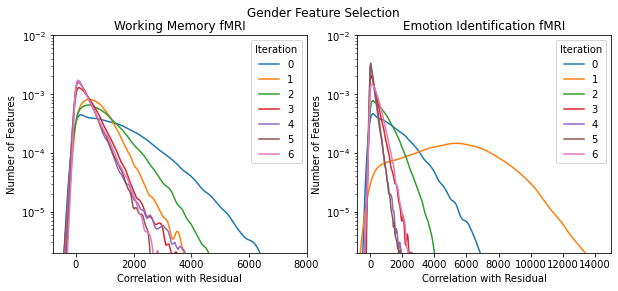

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,2,figsize=(10,4))

for i in range(7):
    for j in range(2):
        sns.kdeplot(data=regionCorr[i,j,:], log_scale=(False, True), label=f'{i}', ax=ax[j])

ax[0].legend(title='Iteration')
ax[1].legend(title='Iteration')
ax[0].set_ylim(2e-6,1e-2)
ax[0].set_xlim(-800,8000)
ax[0].set_title('Working Memory fMRI')
ax[1].set_ylim(2e-6,1e-2)
ax[1].set_xlim(-800,15000)
ax[1].set_title('Emotion Identification fMRI')
ax[0].set_ylabel('Number of Features')
ax[1].set_ylabel('Number of Features')
ax[0].set_xlabel('Correlation with Residual')
ax[1].set_xlabel('Correlation with Residual')

fig.suptitle('Gender Feature Selection')
fig.show()
fig.savefig('../../Work/LatentSim/Correlation.png', format='png', bbox_inches='tight')

In [137]:
masks = []
files = ['AgeMask0', 'AgeMask10Nback', 'GenderMask0', 'GenderMask10Nback', 'WratMask0', 'WratMask10Emoid']

for f in files:
    with open(f'../../Work/LatentSim/GreedMasks/{f}.pkl', 'rb') as fi:
        masks.append(pickle.load(fi))
        
print('Complete')

Complete


/home/anton/.conda/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


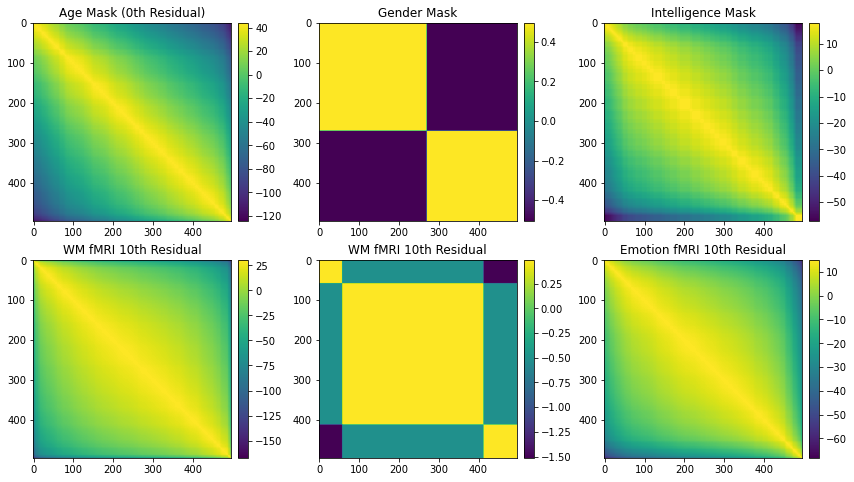

In [147]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(2,3,figsize=(14.5,8))

def addColorbar(ax):
    divider = make_axes_locatable(ax)
    cax1 = divider.append_axes('right', size='5%', pad=0.1)
    return cax1

im1 = ax[0,0].imshow(masks[0].detach().cpu().numpy())
ax[0,0].set_title('Age Mask (0th Residual)')
cax1 = addColorbar(ax[0,0])

im2 = ax[1,0].imshow(masks[1].detach().cpu().numpy())
ax[1,0].set_title('WM fMRI 10th Residual')
cax2 = addColorbar(ax[1,0])

im3 = ax[0,1].imshow(masks[2].detach().cpu().numpy())
ax[0,1].set_title('Gender Mask')
cax3 = addColorbar(ax[0,1])

im4 = ax[1,1].imshow(masks[3].detach().cpu().numpy())
ax[1,1].set_title('WM fMRI 10th Residual')
cax4 = addColorbar(ax[1,1])

im5 = ax[0,2].imshow(masks[4].detach().cpu().numpy())
ax[0,2].set_title('Intelligence Mask')
cax5 = addColorbar(ax[0,2])

im6 = ax[1,2].imshow(masks[5].detach().cpu().numpy())
ax[1,2].set_title('Emotion fMRI 10th Residual')
cax6 = addColorbar(ax[1,2])

fig.colorbar(im1, cax=cax1, orientation='vertical')
fig.colorbar(im2, cax=cax2, orientation='vertical')
fig.colorbar(im3, cax=cax3, orientation='vertical')
fig.colorbar(im4, cax=cax4, orientation='vertical')
fig.colorbar(im5, cax=cax5, orientation='vertical')
fig.colorbar(im6, cax=cax6, orientation='vertical')

fig.show()
fig.savefig('../../Work/LatentSim/Masks.png', format='png', bbox_inches='tight')

In [121]:
masks[0]-masks[1]

tensor([[ 4.9836,  5.0401,  5.2684,  ..., 10.0254, 10.6806, 20.4172],
        [ 5.0401,  4.9836,  5.2119,  ...,  9.9690, 10.6242, 20.3607],
        [ 5.2684,  5.2119,  4.9836,  ...,  9.7406, 10.3958, 20.1324],
        ...,
        [10.0254,  9.9690,  9.7406,  ...,  4.9836,  5.6387, 15.3753],
        [10.6806, 10.6242, 10.3958,  ...,  5.6387,  4.9836, 14.7202],
        [20.4172, 20.3607, 20.1324,  ..., 15.3753, 14.7202,  4.9836]],
       device='cuda:0')

In [136]:
with open('../../Work/LatentSim/Greed/WratValidation.pkl', 'rb') as f:
    wrtRegions, _ = pickle.load(f)
    
print(wrtRegions[1,:,0,4,0])

[ 8817. 24832. 10407. 22793.  7585.  6320. 16760. 27127. 32928.  6726.]


In [148]:
import pickle

with open('../../PNC_Good/MegaMeta3.pkl', 'rb') as f: 
    meta = pickle.load(f)
    
print('Complete')

Complete


In [149]:
with open('../../Work/LatentSim/Splits.pkl', 'rb') as f:
    keys, groups = pickle.load(f)
    
print(len(keys))
print(len(groups[0][0])+len(groups[0][1]))
print('Complete')

620
620
Complete


In [150]:
import numpy as np

nback = np.stack([meta[key]['nback'] for key in keys])
emoid = np.stack([meta[key]['emoid'] for key in keys])

print(nback.shape)
print(emoid.shape)

(620, 264, 231)
(620, 264, 210)


In [151]:
from nilearn.connectome import ConnectivityMeasure

def getFC(timeSeries, kind='correlation', transpose=True):
    connMeasure = ConnectivityMeasure(kind=kind)
    if transpose:
        timeSeries = np.transpose(timeSeries, axes=(0,2,1))
    return connMeasure.fit_transform(timeSeries)

nback_p = getFC(nback)
emoid_p = getFC(emoid)

print(nback_p.shape)

(620, 264, 264)


In [152]:
import torch

def convertTorch(p):
    t = torch.from_numpy(p).float()
    u = []
    for i in range(t.shape[0]):
        u.append(t[i][torch.triu_indices(264,264,offset=1).unbind()])
    return torch.stack(u).cuda()

nback_p_t = convertTorch(nback_p)
emoid_p_t = convertTorch(emoid_p)

print(nback_p_t.shape)
print(emoid_p_t.shape)
print('Complete')

torch.Size([620, 34716])
torch.Size([620, 34716])
Complete


In [153]:
mu_nback = torch.mean(nback_p_t, dim=0, keepdim=True)
mu_emoid = torch.mean(emoid_p_t, dim=0, keepdim=True)
std_nback = torch.std(nback_p_t, dim=0, keepdim=True)
std_emoid = torch.std(emoid_p_t, dim=0, keepdim=True)

nback_p_t = (nback_p_t - mu_nback)/std_nback
emoid_p_t = (emoid_p_t - mu_emoid)/std_emoid

print('Norm complete')

Norm complete


In [154]:
print(torch.min(nback_p_t[:,420:422],dim=0))
print(torch.min(emoid_p_t[:,420:422],dim=0))

torch.return_types.min(
values=tensor([-2.2998, -3.0133], device='cuda:0'),
indices=tensor([603, 350], device='cuda:0'))
torch.return_types.min(
values=tensor([-2.7284, -3.0616], device='cuda:0'),
indices=tensor([351,  33], device='cuda:0'))


In [155]:
age = np.stack([meta[key]['AgeInMonths'] for key in keys])
gen = np.stack([np.array([meta[key]['Gender'] == 'M', meta[key]['Gender'] == 'F']) for key in keys]).astype(int)
wrt = np.stack([meta[key]['wratStd'] for key in keys])

print(age.shape)
print(gen.shape)
print(wrt.shape)

(620,)
(620, 2)
(620,)


In [156]:
age_t = torch.from_numpy(age).float().cuda()
gen_t = torch.from_numpy(gen).float().cuda()
wrt_t = torch.from_numpy(wrt).float().cuda()

print('Complete')

Complete


In [187]:
rnback = AgeV50[:,:,0,:,0].astype('int').reshape(10,50)
remoid = AgeV50[:,:,1,:,0].astype('int').reshape(10,50)

print(rnback)
print(remoid)

[[26032 33816 15376 12949 10372 13472  5583 16763  5594  2648 24499  6662
   8850 18970  6732  2061 19158 18731  2692 32438  6213 32930 30605  8177
    196 31230 26389 20011 11023 11022 18161 22333 17813 22798 20214 17366
  10173 29228 14909 14916    88   166  1280    93   169  7114 19864  4393
  20035 15784]
 [12949 33196 33816 26032 10372  6871  2648 14909  3603 13401  6732  6680
   9047 18970  6662  2692 32438 20011 17428 16763 22637  5208 15479 14847
  30605  6983 33884 19426 19424  5005 24290  6477  6388 33995  5913 30142
  33477 27838 19855 16842 31444 34675 11373 18161 16373 10884 10163 28704
  10604 11041]
 [18729 12315 33196 33816 10372  6684 16763  6680  6662  2648  5594  5583
  13599 13539  5591 29248 11045 16556 19823 20164 18970 19708 19880 20011
  32438  8850 19149  6173  2692 20621 20109  5005  7138 14416  8086 11693
    159   151  7437 34571 18793 21454 33540  2061  2485  7133 14581 32494
   2651  6705]
 [33977 10370 12627 33816 10372  5583  6871  4476  6170  2648  6677

In [200]:
import torch.nn as nn
import torch.nn.functional as F
import time

ceLoss = torch.nn.CrossEntropyLoss()
mseLoss = torch.nn.MSELoss()

yhat = np.zeros(620)

def arith(n):
    return int(n*(n+1)/2)

def mask(e):
    return e - torch.diag(torch.diag(e.detach()))

class LatSim(nn.Module):
    def __init__(self, nTgts, inp, dp=0.5, edp=0.1):
        super(LatSim, self).__init__()
        self.active = nn.Parameter(1e-4*torch.randn(nTgts,inp.shape[-1],2).float().cuda())
        self.dp = nn.Dropout(p=dp)
        self.edp = nn.Dropout(p=edp)
    
    def getLatentsAndEdges(self, x, i):
        e = 1e-10
        y = torch.einsum('ac,ce->ae', x, self.active[i])
        e = e+y@y.T
        return y, y, e
        
    def forward(self, x, y, testIdcs=None):
        x = self.dp(x)
        res = []
        es = []
        for i in range(self.active.shape[0]):
            _, _, e = self.getLatentsAndEdges(x[:,i,:], i)
            if testIdcs is not None:
                e[:,testIdcs] = 0
            e = self.edp(e)
            e = mask(e)
            e[e == 0] = float('-inf')
            e = F.softmax(e, dim=1)
            es.append(e)
            res.append(e@y)
        return res, es

def validate(model, X, y, testIdcs):
    model.eval()
    with torch.no_grad():
        res, _ = model(X, y, testIdcs)
        avg = torch.mean(torch.stack(res), dim=0)
        if res[0].dim() == 1:
            loss = mseLoss(avg[testIdcs], y[testIdcs]).cpu().numpy()**0.5
        else:
            corr = (torch.argmax(avg, dim=1) == torch.argmax(y, dim=1))[testIdcs]
            loss = torch.sum(corr)/len(testIdcs)
    model.train()
    return loss, avg.detach().cpu().numpy()

for grp in range(10):
    trainIdcs = groups[grp][0][0:496]
    validIdcs = groups[grp][0]
    testIdcs = groups[grp][1]

#     X0 = nback_p_t[:,rnback[grp]]
#     X1 = emoid_p_t[:,remoid[grp]]
    X0 = nback_p_t
    X1 = emoid_p_t
    Xreg = torch.stack([X0,X1], dim=1)

    nEpochs = 1000
    pPeriod = 20
    thresh = 50

    sim = LatSim(2, Xreg, 0.5, 0) # 0.2 wrat, 0.1 other
    optim = torch.optim.Adam(sim.parameters(), lr=1e-4, weight_decay=1e-4) 

    Xt = Xreg[trainIdcs]
    Xv = Xreg[validIdcs]

    trainLoss = []
    validLoss = []

    vIdcs1 = np.arange(496,len(validIdcs))
    vIdcs2 = validIdcs[496:]
    vIdcs3 = np.concatenate([testIdcs, vIdcs2])

    var = age_t

    for epoch in range(nEpochs):
        optim.zero_grad()
        res, _ = sim(Xt, var[trainIdcs])
        avg = torch.mean(torch.stack(res), dim=0)
        loss = 0
        for r in res + [avg]:
            loss += mseLoss(r, var[trainIdcs])
        loss = torch.stack([loss/(len(res)+1)])
        torch.sum(loss).backward()
        optim.step()
        if epoch % pPeriod == 0 or epoch == nEpochs-1 or torch.all(loss[0:3] < thresh):
            print(f'epoch {epoch} loss={(float(loss))}')
            lossV, _ = validate(sim, Xv, var[validIdcs], vIdcs1)
            if len(validLoss) == 0 or lossV < min(validLoss):
                print(f'New best validation epoch {epoch} loss={lossV}')
                torch.save(sim.state_dict(), '../../Work/LatentSim/sim.pyt')
            validLoss.append(lossV)
            if torch.all(loss[0:3] < thresh):
                print('Early stopping')
                break

    print('Finished training')

    sim.load_state_dict(torch.load('../../Work/LatentSim/sim.pyt'))
    loss, avg = validate(sim, Xreg, var, testIdcs)
    yhat[testIdcs] = avg[testIdcs]
    print(f'FINISHED {grp} {loss}')

epoch 0 loss=1514.6195068359375
New best validation epoch 0 loss=42.86626052856445
epoch 20 loss=539.5856323242188
New best validation epoch 20 loss=24.746891021728516
epoch 40 loss=194.6437225341797
New best validation epoch 40 loss=23.57125473022461
epoch 60 loss=74.89307403564453
New best validation epoch 60 loss=22.479238510131836
epoch 80 loss=51.31257629394531
New best validation epoch 80 loss=21.512739181518555
epoch 84 loss=47.59739685058594
New best validation epoch 84 loss=21.30536651611328
Early stopping
Finished training
FINISHED 0 24.467573165893555
epoch 0 loss=1470.564208984375
New best validation epoch 0 loss=41.04487228393555
epoch 20 loss=942.93896484375
New best validation epoch 20 loss=34.25526809692383
epoch 40 loss=418.7347106933594
New best validation epoch 40 loss=25.433073043823242
epoch 60 loss=120.97085571289062
New best validation epoch 60 loss=23.517364501953125
epoch 80 loss=60.471275329589844
epoch 91 loss=49.3104248046875
New best validation epoch 91 los

In [202]:
yhatFull = yhat

/home/anton/.conda/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


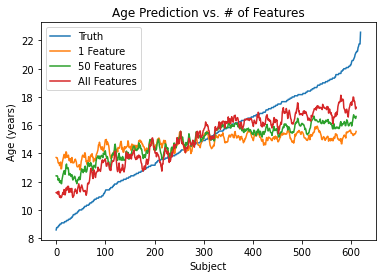

In [211]:
def clean(y):
    return np.convolve(y, np.ones(10)/10, 'valid')

idcs = np.argsort(age)

fig, ax = plt.subplots()

ax.plot(age[idcs]/12, label='Truth')
ax.plot(clean(yhat1[idcs]/12), label='1 Feature')
# ax.plot(clean(yhat3[idcs]/12), label='3 Features')
# ax.plot(clean(yhat10[idcs]/12), label='10 Features')
ax.plot(clean(yhat50[idcs]/12), label='50 Features')
ax.plot(clean(yhatFull[idcs]/12), label='All Features')
ax.legend()
ax.set_title('Age Prediction vs. # of Features')
ax.set_xlabel('Subject')
ax.set_ylabel('Age (years)')

fig.show()
fig.savefig('../../Work/LatentSim/AgeExample.png', format='png', bbox_inches='tight')

In [201]:
np.mean((age-yhat)**2)**0.5/12

2.0599463549221215

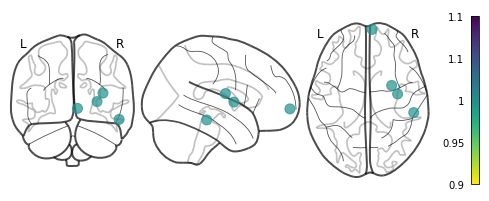

In [4]:
import nilearn.plotting as niplt
import numpy as np

r42 = (36,-9,14)
r230 = (29,1,4)
r10 = (55,-31,-17)
r74 = (6,67,-4)

niplt.plot_markers([1,1,1,1],[r42,r230,r10,r74])

/home/anton/.conda/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:65: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


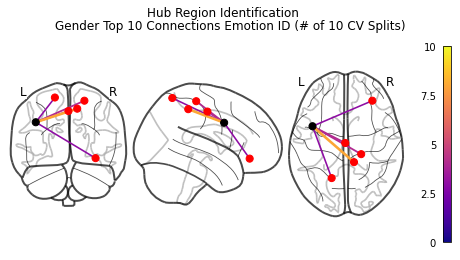

In [40]:
import matplotlib.pyplot as plt

# Nback
# 2, 124
# 2, 156
# 106, 124

# Emoid
# Top 10
# 186, 202
# 136, 202
# 14, 186
# 131, 202
# 27, 186
# 186, 262
# 12, 186
# Top 50
# 202, 257
# 93, 136
# 15, 243

r186 = (-41,6,33)
r202 = (11,-39,50)
r136 = (-46,31,-13)
r14 = (0,-15,47)
r131 = (-31,19,-19)
r27 = (20,-29,60)
r262 = (-17,-59,64)
r12 = (34,38,-12)
r257 = (25,-58,60)
r93 = (-2,-37,44)
r15 = (10,-2,45)
r243 = (-32,-55,-25)

nodes = np.array([r186,r202,r136,r14,r131,r27,r262,r12,r257,r93,r15,r243])
nodes = np.array([r186,r202,r14,r27,r262,r12])
A = np.zeros((nodes.shape[0],nodes.shape[0]))
# A[0,1] = 8
# # A[1,2] = 4
# A[0,3] = 4
# # A[4,1] = 4
# A[5,0] = 4
# A[0,6] = 3
# A[7,0] = 3
# # A[1,8] = 4
# # A[9,2] = 4
# # A[10,11] = 4
A[0,1] = 8
# A[1,2] = 4
A[0,2] = 4
# A[4,1] = 4
A[3,0] = 4
A[0,4] = 3
A[5,0] = 3
# A[1,8] = 4
# A[9,2] = 4
# A[10,11] = 4

A = A+A.T

cm = plt.get_cmap('plasma')
fig, ax = plt.subplots(figsize=(8,4))
niplt.plot_connectome(A, nodes, ['black'] + 5*['red'], edge_cmap=cm, axes=ax, edge_vmin=0, edge_vmax=10, colorbar=True)
ax.set_title('Gender Top 10 Connections Emotion ID (# of 10 CV Splits)')
fig.show()
fig.suptitle('Hub Region Identification')
fig.savefig('../../Work/LatentSim/GenderGlass.png', format='png', bbox_inches='tight')